Step 1:
EDA STEPS:
1.Indexing data

2.Visualize data(check the statistical data for each column)

3.Barchart/piechart(default rate in different regions, default rate in different types)

4.Attribute(numeric(correlation),rank the top 10 correlation),
EDA
https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
simple histogram and distribution.

5. Correlation (with the target varaible)

Step 2:
toy_data = df.head(100)

pre-processing
missing value (impute(), delete,)
categorical varaible (onehot encoding)
outlier

Step 3:
Model:

1.Naive-Bayes

2.Logistic regression

3.Neuro Network

4.Decision tree

5. Random Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

6. Adaboost
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

Step 3:
Evaluate the model and compare it
cross_val_score
accuracy, sensitivity...

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics


In [16]:
##Thanks for Janio Alexander's code

##importing packages and data
import pandas as pd
import numpy as np
loan=pd.read_csv('/Users/taotao/Desktop/loan/loan.csv',low_memory=False)
loan_original=loan.copy()

##import packages for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

##visualize data
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
random_sample = loan.sample( n = 10000)

In [4]:
# loan.info()

In [3]:
# Replace the name of some columns
loan = loan.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income"})


In [4]:
## check the statistical info of the colums
loan.describe()

,id,member_id,loan_amount,funded_amount,investor_funds,interest_rate,installment,annual_income,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Total committed by Investors')

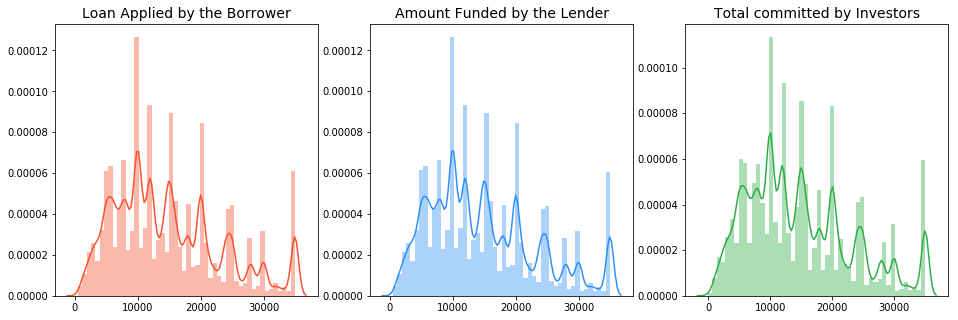

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))




loan_amount = loan["loan_amount"].values
funded_amount = loan["funded_amount"].values
investor_funds = loan["investor_funds"].values


sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

Text(0,0.5,'Average loan amount issued')

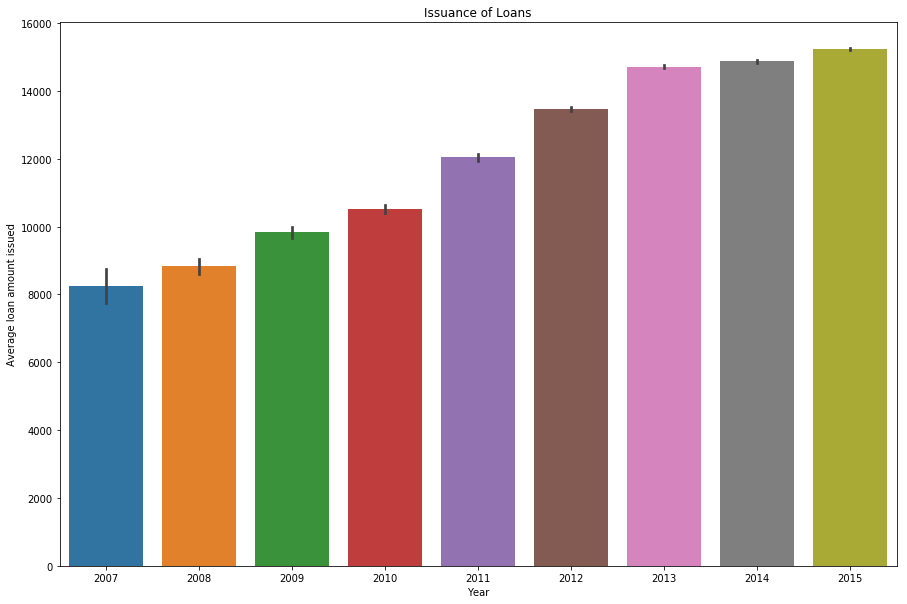

In [6]:
##analyze loan_amount column
## 1.find out the which year has the largest amount of loan issuance(using bar plot)
## it turns out issuance of loans ranked high in 2015.

##calculate the amount of loan issued by year.
loan['issue_d'].head()
loan_series = pd.to_datetime(loan['issue_d'])
loan['year'] = loan_series.dt.year

## plot the loan_amount each year
plt.figure(figsize=(15,10))
sns.barplot('year', 'loan_amount', data=loan)
plt.title('Issuance of Loans')
plt.xlabel('Year')
plt.ylabel('Average loan amount issued')

Text(0,0.5,'Average loan amount issued')

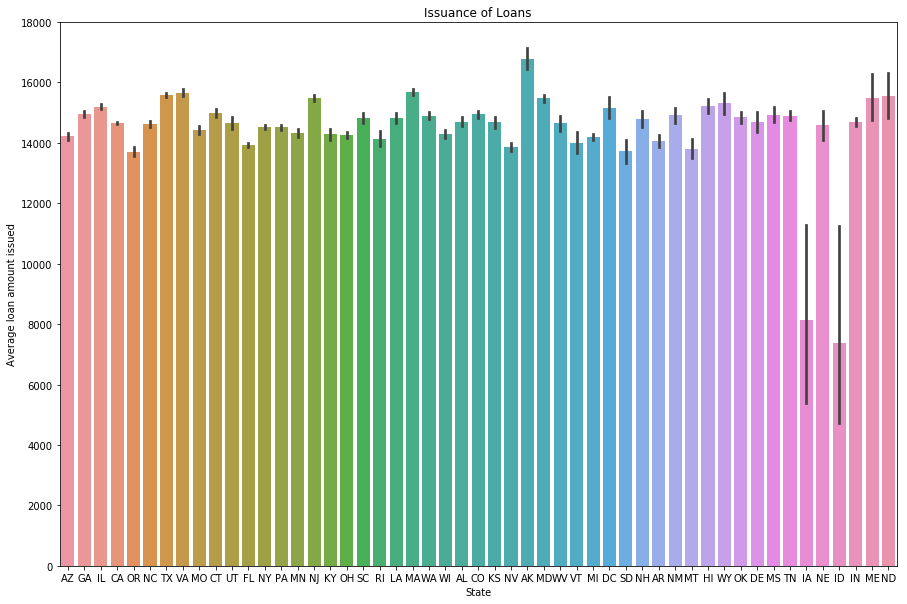

In [7]:
## 2.find out which states has the largest amount of loan issuance(using bar plot)
plt.figure(figsize=(15,10))
sns.barplot('addr_state', 'loan_amount', data=loan)
plt.title('Issuance of Loans')
plt.xlabel('State')
plt.ylabel('Average loan amount issued')



Text(0,0.5,'Average loan amount issued')

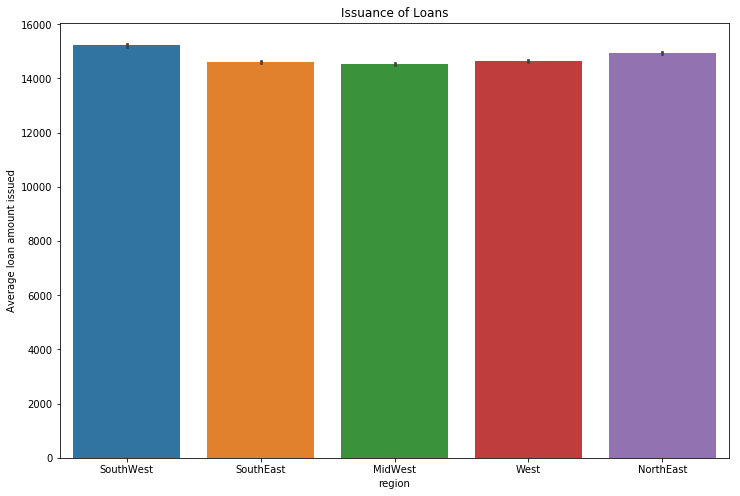

In [8]:
## 3.classify the area of the loan and find out which area has the largest amount of loan issuance
loan['addr_state'].unique()

# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']



loan['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


loan['region'] = loan['addr_state'].apply(finding_regions)

# plot the amount of loan issuance by different regions
##it turns out southweastern
plt.figure(figsize=(12,8))
sns.barplot('region', 'loan_amount', data=loan)
plt.title('Issuance of Loans')
plt.xlabel('region')
plt.ylabel('Average loan amount issued')


In [5]:
# create loan_status indicator
# 1: notcurent
# 0: current
random_sample["loan_status_ind"] = np.where(random_sample["loan_status"] != "Current",1,0) 

In [7]:
random_sample["loan_status_ind"].value_counts()

0    6801
1    3199
Name: loan_status_ind, dtype: int64

In [11]:
##Examine missing data
## Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

# Missing values statistics
## how to handle missing value data
missing_values = missing_values_table(loan)
missing_values.head(20)

Your selected dataframe has 77 columns.
There are 40 columns that have missing values.


,Missing Values,% of Total Values
dti_joint,886870,99.9
annual_inc_joint,886868,99.9
verification_status_joint,886868,99.9
il_util,868762,97.9
mths_since_rcnt_il,866569,97.7
total_cu_tl,866007,97.6
inq_fi,866007,97.6
all_util,866007,97.6
max_bal_bc,866007,97.6
open_rv_24m,866007,97.6


In [13]:
## check the column types

# Number of each type of column
loan.dtypes.value_counts()

float64    49
object     25
int64       3
dtype: int64

In [10]:
##Number of unique classes in each object column(check the categorical columns)
random_sample.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

##drop some unrelated columns and columns with high numbers of unique values
random_sample.drop(['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'title'], axis=1, inplace=True)

In [11]:
## Encoding Catergorical variables
# one-hot encoding of categorical variables
random_sample2 = pd.get_dummies(random_sample)



In [15]:
random_sample.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

In [14]:
random_sample.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,last_credit_pull_d_Sep-2011,last_credit_pull_d_Sep-2012,last_credit_pull_d_Sep-2013,last_credit_pull_d_Sep-2014,last_credit_pull_d_Sep-2015,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
645793,20000.0,20000.0,19850.0,15.61,482.23,50000.0,7.11,0.0,0.0,NaN,...,0,0,0,0,0,1,0,0,0,0
